In [1]:
from util import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mob1 = '../data/01-01-2023/DATA_LABEL'

In [4]:
mob1 = pd.read_parquet(mob1)
mob1

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_HOLD,CASA_BAL_SUM_NOW,CASA_BAL_SUM_36M,...,CASA_BAL_SUM_12M,CASA_BAL_MAX_12M,CASA_TXN_AMT_SUM_12M,CASA_TXN_AMT_SUM_24M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M,CASA_ACCT_CT_36M,CASA_ACCT_ACTIVE_CT_12M,CASA_DAY_SINCE_LAST_TXN_CT_36M,REACTIVATED_CASA
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
4131389,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,44.0,3496.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,1
17174047,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,19.0,128.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
17313854,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,25.0,94.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
17084043,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,149.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
17140611,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,135.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479714,VN0010007,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,53.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
17519651,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Bảo vệ tài sản,48.0,40.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0
16870958,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,206.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1096.0,0


In [5]:
mob1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911580 entries, 4131389 to 17634059
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   AREA                            911578 non-null  object 
 1   PROFESSION                      911577 non-null  object 
 2   GEN_GRP                         911577 non-null  object 
 3   LIFE_STG                        907906 non-null  object 
 4   AGE                             911577 non-null  float64
 5   LOR                             911577 non-null  float64
 6   CREDIT_SCORE                    10655 non-null   float64
 7   CASA_HOLD                       911088 non-null  float64
 8   CASA_BAL_SUM_NOW                415079 non-null  float64
 9   CASA_BAL_SUM_36M                420592 non-null  float64
 10  CASA_BAL_SUM_24M                420592 non-null  float64
 11  CASA_BAL_SUM_12M                415345 non-null  float64
 12  CASA_BAL_MAX_

In [6]:
mob1.columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'LIFE_STG', 'AGE', 'LOR',
       'CREDIT_SCORE', 'CASA_HOLD', 'CASA_BAL_SUM_NOW', 'CASA_BAL_SUM_36M',
       'CASA_BAL_SUM_24M', 'CASA_BAL_SUM_12M', 'CASA_BAL_MAX_12M',
       'CASA_TXN_AMT_SUM_12M', 'CASA_TXN_AMT_SUM_24M', 'CASA_TXN_AMT_SUM_36M',
       'CASA_TXN_CT_12M', 'CASA_ACCT_CT_36M', 'CASA_ACCT_ACTIVE_CT_12M',
       'CASA_DAY_SINCE_LAST_TXN_CT_36M', 'REACTIVATED_CASA'],
      dtype='object')

In [7]:
for c in mob1.columns:
    if mob1[c].dtype == object:
        print(c, mob1[c].nunique())

AREA 8
PROFESSION 17
GEN_GRP 5
LIFE_STG 6


# IV and WoE

Guide line for IV:

- IV < 0.02: not useful for prediction-
- 0.02 - 0.1: weak relationship between indept and dependent
- 0.1 - 0.3: medium
- 0.3 - 0.5: strong
- IV > 0.5: suspicious predictive

In [8]:
def iv_woe(df, target, bins=10):
    def iv_power(x):
        if x < 0.02:
            return '0. no-use'
        elif x <= 0.1:
            return '1. weak'
        elif x <= 0.3:
            return '2. medium'
        elif x <= 0.5:
            return '3. strong'
        elif x > 0.5:
            return '4. suspicious'

    iv_df, woe_df = pd.DataFrame(), pd.DataFrame()
    cols = df.columns.tolist()
    cols.remove(target)
    for c in cols:
        if (df[c].dtype.kind in 'bifc') and (df[c].nunique() > 10):
            binned_x = pd.qcut(df[c], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': df[target]})
        else:
            d0 = pd.DataFrame({'x': df[c], 'y': df[target]})
        d = d0.groupby('x',as_index=False).agg({'y': ['count', 'sum']})
        d.columns = ['cutoff', 'n', 'num_event']
        d['perc_event'] = np.maximum(d['num_event'], 0.5) / d['num_event'].sum()
        d['num_non_event'] = d['n'] - d['num_event']
        d['perc_non_event'] = np.maximum(d['num_non_event'], 0.5) / d['num_non_event'].sum()
        d['woe'] = np.log(d['perc_non_event']/d['perc_event'])
        d['iv'] = d['woe'] * (d['perc_non_event'] - d['perc_event'])
        # print(f'{c}, {d["iv"].sum()}')
        d.insert(loc=0, column='variable', value=c)
        tmp = pd.DataFrame({'variable': [c], 'iv': [d['iv'].sum()]}, columns=['variable', 'iv'])
        iv_df = pd.concat([iv_df, tmp], axis=0)
        woe_df = pd.concat([woe_df, d], axis=0)
    iv_df['iv_power'] = iv_df['iv'].apply(lambda x: iv_power(x))
    return iv_df, woe_df

In [9]:
iv_df, woe_df = iv_woe(mob1, 'REACTIVATED_CASA')

In [10]:
iv_df.sort_values(by='iv')

,variable,iv,iv_power
0,CASA_DAY_SINCE_LAST_TXN_CT_36M,0.000000,0. no-use
0,CASA_HOLD,0.000000,0. no-use
0,CASA_BAL_SUM_NOW,0.006074,0. no-use
0,CASA_BAL_MAX_12M,0.009277,0. no-use
0,CASA_BAL_SUM_12M,0.010467,0. no-use
0,CASA_ACCT_CT_36M,0.036443,1. weak
0,LIFE_STG,0.081053,1. weak
0,GEN_GRP,0.097163,1. weak
0,AGE,0.130250,2. medium
0,CASA_ACCT_ACTIVE_CT_12M,0.149263,2. medium


In [11]:
woe_df

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
0,AREA,VN0010001,153896,2683,0.203242,151213,0.168318,-0.188543,0.006585
1,AREA,VN0010002,70097,547,0.041436,69550,0.077417,0.625055,0.022490
2,AREA,VN0010003,77481,1835,0.139005,75646,0.084203,-0.501277,0.027471
3,AREA,VN0010004,60525,2153,0.163094,58372,0.064975,-0.920323,0.090301
4,AREA,VN0010005,128265,1417,0.107340,126848,0.141197,0.274150,0.009282
...,...,...,...,...,...,...,...,...,...
2,CASA_ACCT_CT_36M,3.0,4,2,0.006116,2,0.000046,-4.897360,0.029730
3,CASA_ACCT_CT_36M,4.0,2,0,0.001529,2,0.000046,-3.511066,0.005208
0,CASA_ACCT_ACTIVE_CT_12M,1.0,115,15,0.937500,100,1.000000,0.064539,0.004034
1,CASA_ACCT_ACTIVE_CT_12M,3.0,1,1,0.062500,0,0.005000,-2.525729,0.145229


In [12]:
woe_df[woe_df['variable']=='PROFESSION']

,variable,cutoff,n,num_event,perc_event,num_non_event,perc_non_event,woe,iv
0,PROFESSION,"Cong nghiep che bien, san xuat",39728,2046,0.154988,37682,0.041945,-1.307000,0.147748
1,PROFESSION,Cong nghiep khai thac,1330,1,0.000076,1329,0.001479,2.971886,0.004171
2,PROFESSION,"Giao duc, dao tao",31754,174,0.013181,31580,0.035152,0.980928,0.021552
3,PROFESSION,"HDong Dang, Doan The va Hiep Hoi",337614,6169,0.467313,331445,0.368938,-0.236371,0.023253
4,PROFESSION,"Khoa hoc, cong nghe",151,0,0.000038,151,0.000168,1.490131,0.000194
5,PROFESSION,"Kinh doanh tai san, dich vu tu van",192566,4265,0.323082,188301,0.209602,-0.432697,0.049102
6,PROFESSION,"Nong, lam nghiep",43736,196,0.014847,43540,0.048465,1.183025,0.039771
7,PROFESSION,"Qly nha nuoc, an ninh, quoc phong",3193,19,0.001439,3174,0.003533,0.898013,0.001880
8,PROFESSION,"Sx va pphoi dien, khi dot va nuoc",1302,0,0.000038,1302,0.001449,3.644508,0.005144
9,PROFESSION,"Tai chinh, tin dung",2925,13,0.000985,2912,0.003241,1.191350,0.002688


In [13]:
valid_cols = iv_df[iv_df['iv']>0.02]['variable'].tolist()
valid_cols

['AREA',
 'PROFESSION',
 'GEN_GRP',
 'LIFE_STG',
 'AGE',
 'LOR',
 'CREDIT_SCORE',
 'CASA_BAL_SUM_36M',
 'CASA_BAL_SUM_24M',
 'CASA_TXN_AMT_SUM_12M',
 'CASA_TXN_AMT_SUM_24M',
 'CASA_TXN_AMT_SUM_36M',
 'CASA_TXN_CT_12M',
 'CASA_ACCT_CT_36M',
 'CASA_ACCT_ACTIVE_CT_12M']

In [14]:
valid_mob1 = mob1[valid_cols]
valid_mob1

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_BAL_SUM_24M,CASA_TXN_AMT_SUM_12M,CASA_TXN_AMT_SUM_24M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_12M,CASA_ACCT_CT_36M,CASA_ACCT_ACTIVE_CT_12M
CUSTOMER_CDE,,,,,,,,,,,,,,,
4131389,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,44.0,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17174047,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,19.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17313854,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,25.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17084043,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,149.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17140611,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479714,VN0010007,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17519651,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Bảo vệ tài sản,48.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16870958,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Get dummy variable for category cols
cat_dummy = [pd.get_dummies(mob1[c], prefix=c, prefix_sep=':') for c in valid_mob1.select_dtypes(object).columns]
cat_dummy = pd.concat(cat_dummy, axis=1)
cat_dummy

,AREA:VN0010001,AREA:VN0010002,AREA:VN0010003,AREA:VN0010004,AREA:VN0010005,AREA:VN0010006,AREA:VN0010007,AREA:VN0010008,"PROFESSION:Cong nghiep che bien, san xuat",PROFESSION:Cong nghiep khai thac,...,GEN_GRP:Gen X,GEN_GRP:Gen Y,GEN_GRP:Gen Z,GEN_GRP:Trước Gen X,LIFE_STG:Bảo vệ tài sản,LIFE_STG:Bắt đầu sự nghiệp,LIFE_STG:Cuối sự nghiệp,LIFE_STG:Lập gia đình,LIFE_STG:Nghỉ hưu,LIFE_STG:Thiết lập tài sản
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
4131389,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
17174047,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
17313854,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
17084043,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
17140611,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479714,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
17519651,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
16870958,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [16]:
preprocess_data = pd.concat([valid_mob1, cat_dummy], axis=1)
preprocess_data

,AREA,PROFESSION,GEN_GRP,LIFE_STG,AGE,LOR,CREDIT_SCORE,CASA_BAL_SUM_36M,CASA_BAL_SUM_24M,CASA_TXN_AMT_SUM_12M,...,GEN_GRP:Gen X,GEN_GRP:Gen Y,GEN_GRP:Gen Z,GEN_GRP:Trước Gen X,LIFE_STG:Bảo vệ tài sản,LIFE_STG:Bắt đầu sự nghiệp,LIFE_STG:Cuối sự nghiệp,LIFE_STG:Lập gia đình,LIFE_STG:Nghỉ hưu,LIFE_STG:Thiết lập tài sản
CUSTOMER_CDE,,,,,,,,,,,,,,,,,,,,,
4131389,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Thiết lập tài sản,44.0,3496.0,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1
17174047,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,19.0,128.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
17313854,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,25.0,94.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
17084043,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,149.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
17140611,VN0010001,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,135.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17479714,VN0010007,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,53.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0
17519651,VN0010006,"Kinh doanh tai san, dich vu tu van",Gen X,Bảo vệ tài sản,48.0,40.0,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
16870958,VN0010006,"HDong Dang, Doan The va Hiep Hoi",Gen Z,Bắt đầu sự nghiệp,22.0,206.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,1,0,0,0,0


Guideline for WoE cat:

Event and non-event is reactive and no-reactive

- WoE > 0: distribution of no-reactive > distribution of reactive

- WoE < 0: distribution of no-reactive < distribution of reactive

In [66]:
def woe_cat(df, cat_feat, event_df):
    label = event_df.name
    df = pd.concat([df[cat_feat], event_df], axis=1)
    df = pd.concat([
        df.groupby(cat_feat, as_index=False)[label].count(), 
        df.groupby(cat_feat, as_index=False)[label].mean()
        ], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_event']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_event'] = df['prop_event'] * df['n_obs']
    df['n_non_event'] = (1 - df['prop_event']) * df['n_obs']
    df['prop_n_event'] = df['n_event'] / df['n_event'].sum()
    df['prop_n_non_event'] = df['n_non_event'] / df['n_non_event'].sum()
    df['woe'] = np.log(df['prop_n_non_event'] / df['prop_n_event'])
    df = df.sort_values(['woe'])
    df = df.reset_index(drop=True)
    df['diff_prop_event'] = df['prop_event'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['iv'] = (df['prop_n_non_event'] - df['prop_n_event']) * df['woe']
    df['iv'] = df['iv'].sum()
    return df

In [67]:
def plot_by_woe(df_woe):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['woe']
    plt.figure(figsize=(5,5))
    plt.plot(x, y, marker='o', linestyle='dashed')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('WoE')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


In [68]:
y = mob1['REACTIVATED_CASA']
X = preprocess_data

In [69]:
X.select_dtypes(object).columns

Index(['AREA', 'PROFESSION', 'GEN_GRP', 'LIFE_STG'], dtype='object')

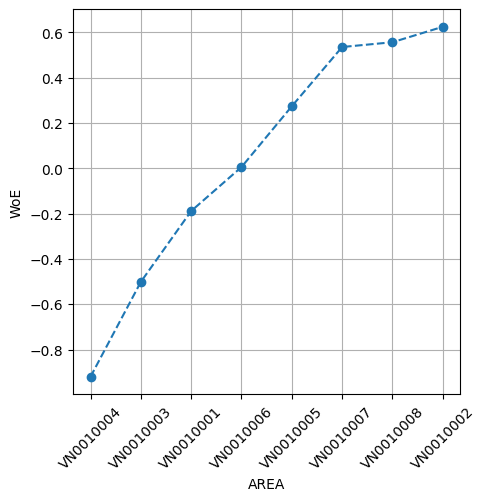

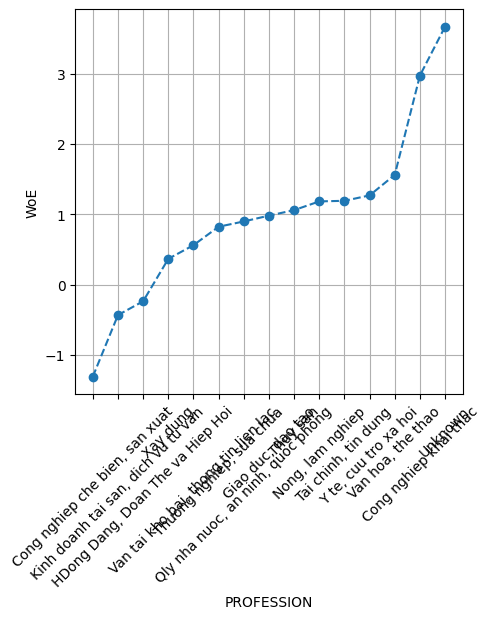

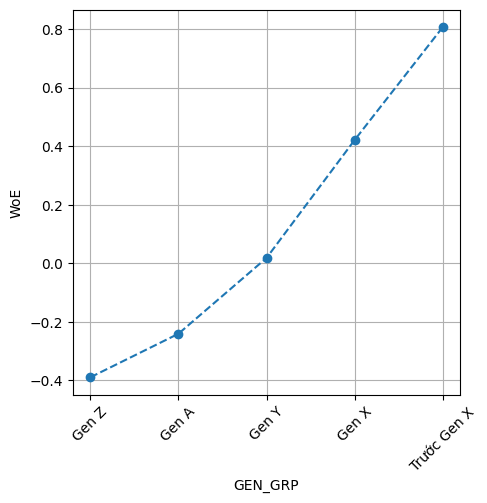

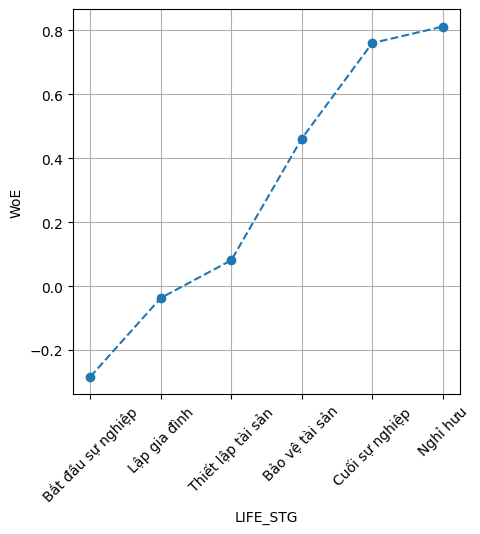

In [70]:
for c in X.select_dtypes(object).columns:
    tmp_df = woe_cat(X, c, y)
    plot_by_woe(tmp_df)

Guideline for WoE continous variable:

Event and non-event is reactive and no-reactive

WoE > 0: distribution of no-reactive > distribution of reactive
WoE < 0: distribution of no-reactive < distribution of reactive

In [71]:
def woe_continous(df, cat_feat, event_df):
    label = event_df.name
    df = pd.concat([df[cat_feat], event_df], axis=1)
    df = pd.concat([
        df.groupby(cat_feat, as_index=False)[label].count(), 
        df.groupby(cat_feat, as_index=False)[label].mean()
        ], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_event']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_event'] = df['prop_event'] * df['n_obs']
    df['n_non_event'] = (1 - df['prop_event']) * df['n_obs']
    df['prop_n_event'] = df['n_event'] / df['n_event'].sum()
    df['prop_n_non_event'] = df['n_non_event'] / df['n_non_event'].sum()
    df['woe'] = np.log(df['prop_n_non_event'] / df['prop_n_event'])
    # df = df.sort_values(['woe'])
    # df = df.reset_index(drop=True)
    df['diff_prop_event'] = df['prop_event'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['iv'] = (df['prop_n_non_event'] - df['prop_n_event']) * df['woe']
    df['iv'] = df['iv'].sum()
    return df

In [72]:
y = mob1['REACTIVATED_CASA']
X = preprocess_data.copy()

In [73]:
valid_cols

['AREA',
 'PROFESSION',
 'GEN_GRP',
 'LIFE_STG',
 'AGE',
 'LOR',
 'CREDIT_SCORE',
 'CASA_BAL_SUM_36M',
 'CASA_BAL_SUM_24M',
 'CASA_TXN_AMT_SUM_12M',
 'CASA_TXN_AMT_SUM_24M',
 'CASA_TXN_AMT_SUM_36M',
 'CASA_TXN_CT_12M',
 'CASA_ACCT_CT_36M',
 'CASA_ACCT_ACTIVE_CT_12M']

## AGE

<Axes: xlabel='AGE', ylabel='Count'>

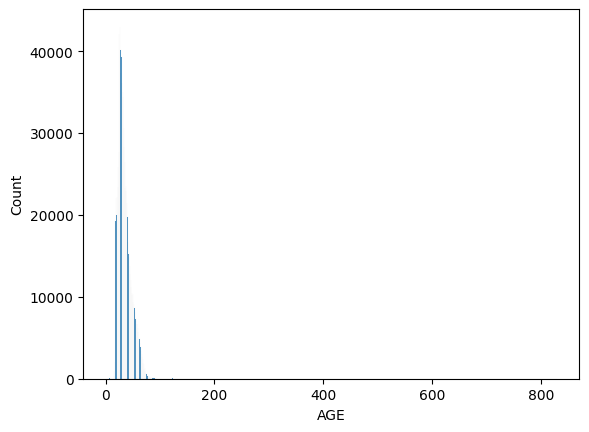

In [74]:
sns.histplot(X['AGE'])

In [75]:
X['AGE'] = X['AGE'].apply(lambda x: 80 if x > 80 else x)

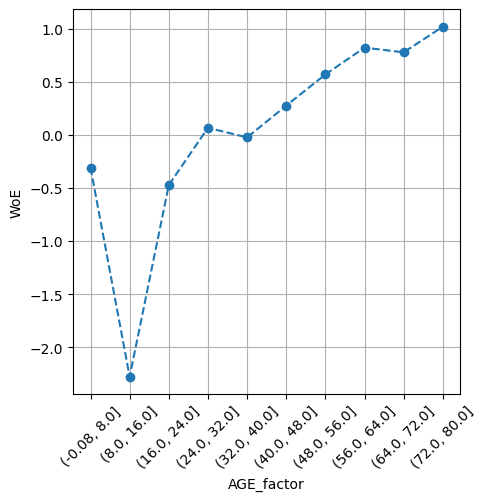

In [76]:
X['AGE_factor'] = pd.cut(X['AGE'],10)
plot_by_woe(woe_continous(X, 'AGE_factor', y))

## LOR

<Axes: xlabel='LOR', ylabel='Count'>

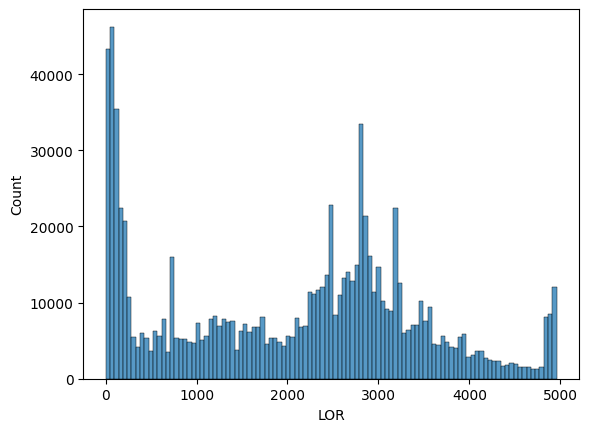

In [77]:
sns.histplot(X['LOR'])

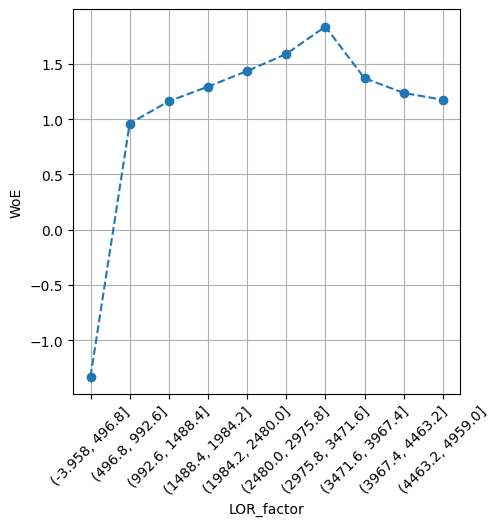

In [78]:
X['LOR_factor'] = pd.cut(X['LOR'],10)
plot_by_woe(woe_continous(X, 'LOR_factor', y))

## CREDIT SCORE

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

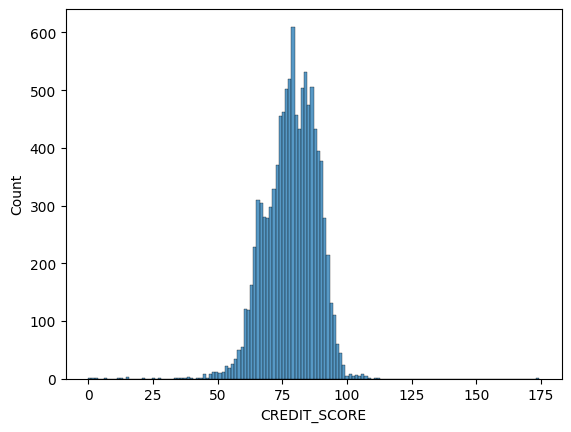

In [79]:
sns.histplot(X['CREDIT_SCORE'])

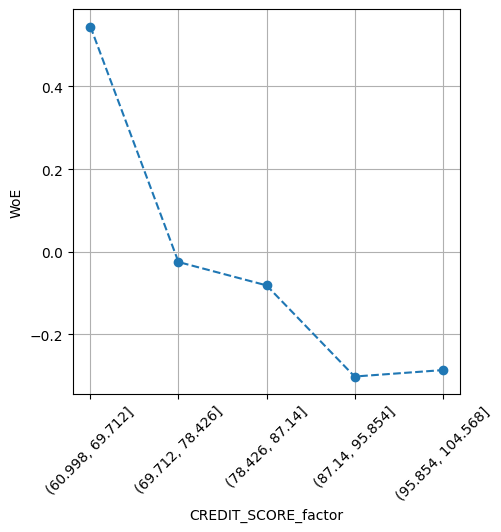

In [80]:
X['CREDIT_SCORE_factor'] = pd.cut(X['CREDIT_SCORE'],20)
plot_by_woe(woe_continous(X, 'CREDIT_SCORE_factor', y))